### import Library

In [17]:
import pandas as pd
import talib as ta
import pynance as pn
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### Load and Prepare the Data

In [3]:
# Load the CSV files
aapl_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
goog_data = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
msft_data = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
amzn_data = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
meta_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
nvda_data = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_data = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')
sentiment_data = pd.read_csv('../data/raw_analyst_ratings/raw_analyst_ratings.csv')

In [4]:
print("AAPL Data")
print(aapl_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nAMZN Data")
print(amzn_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nGOOG Data")
print(goog_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nMSFT Data")
print(msft_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\META Data")
print(meta_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\nNVDA Data")
print(nvda_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

print("\TSLA Data")
print(tsla_data[['Date','Open','High','Low','Close','Adj Close','Volume']].head())

AAPL Data
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600

AMZN Data
         Date      Open      High       Low     Close  Adj Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000

GOOG Data
         Date      Open      High       Low     Cl

### Apply Analysis Indicators with TA-Lib

In [5]:
# Calculate Moving Averages, RSI, and MACD for AAPL
aapl_data['SMA_50'] = ta.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['RSI'] = ta.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], aapl_data['MACD_hist'] = ta.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Repeat for GOOG and MSFT
goog_data['SMA_50'] = ta.SMA(goog_data['Close'], timeperiod=20)
goog_data['RSI'] = ta.RSI(goog_data['Close'], timeperiod=14)
goog_data['MACD'], goog_data['MACD_signal'], goog_data['MACD_hist'] = ta.MACD(goog_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

msft_data['SMA_50'] = ta.SMA(msft_data['Close'], timeperiod=20)
msft_data['RSI'] = ta.RSI(msft_data['Close'], timeperiod=14)
msft_data['MACD'], msft_data['MACD_signal'], msft_data['MACD_hist'] = ta.MACD(msft_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the first few rows with indicators
print("\nAAPL Data with Indicators:")
print(aapl_data[["Date","Open","High","Low","Close","Adj Close","Volume","SMA_50","RSI","MACD"]].tail())



AAPL Data with Indicators:
             Date        Open        High         Low       Close   Adj Close  \
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

         Volume      SMA_50        RSI      MACD  
10993  61777600  224.228500  48.687742  4.662717  
10994  51391200  224.440500  47.386437  3.748082  
10995  41601300  224.633500  48.055700  3.026267  
10996  36311800  225.014500  48.476184  2.448591  
10997  41643800  225.117001  49.359115  2.012764  


In [6]:
nan_summary = aapl_data[['SMA_50', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].isna().sum()
print("NaN Values Summary:\n", nan_summary)

NaN Values Summary:
 SMA_50         19
RSI            14
MACD           33
MACD_signal    33
MACD_hist      33
dtype: int64


In [7]:
# Load historical price data for AAPL
aapl_data = pn.data.get('AAPL', start='2019-06-06', end='2020-06-05')
print(aapl_data)

# Calculate financial metrics using PyNance
aapl_data['SMA_50'] = ta.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['RSI'] = ta.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], aapl_data['MACD_hist'] = ta.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


# Display the calculated metrics
print("\nAAPL Financial Metrics:")
print(aapl_data.tail())


               Open     High      Low    Close        Volume
Date                                                        
2020-06-05  79.5983  81.6649  79.5683  81.6041  1.393883e+08
2020-06-04  79.8534  80.1555  78.9651  79.3430  8.892438e+07
2020-06-03  79.9202  80.2981  79.3380  80.0318  1.061190e+08
2020-06-02  78.9571  79.6211  78.5106  79.5963  8.900813e+07
2020-06-01  78.2194  79.3500  78.0859  79.2284  8.228073e+07
...             ...      ...      ...      ...           ...
2019-06-12  47.1821  47.6746  47.0435  47.2369  7.503511e+07
2019-06-11  47.3985  47.6826  47.0954  47.3865  1.107155e+08
2019-06-10  46.6617  47.5261  46.6148  46.8471  1.077885e+08
2019-06-07  45.3676  46.6876  45.1911  46.2539  1.261372e+08
2019-06-06  44.5361  45.1184  44.3108  45.0556  9.260103e+07

[253 rows x 5 columns]
               Open     High       Low   Close    Volume
Date                                                    
2023-12-29  140.680  141.435  139.9000  140.93  14880961
2023-12-28  

 ### Visualize the Data

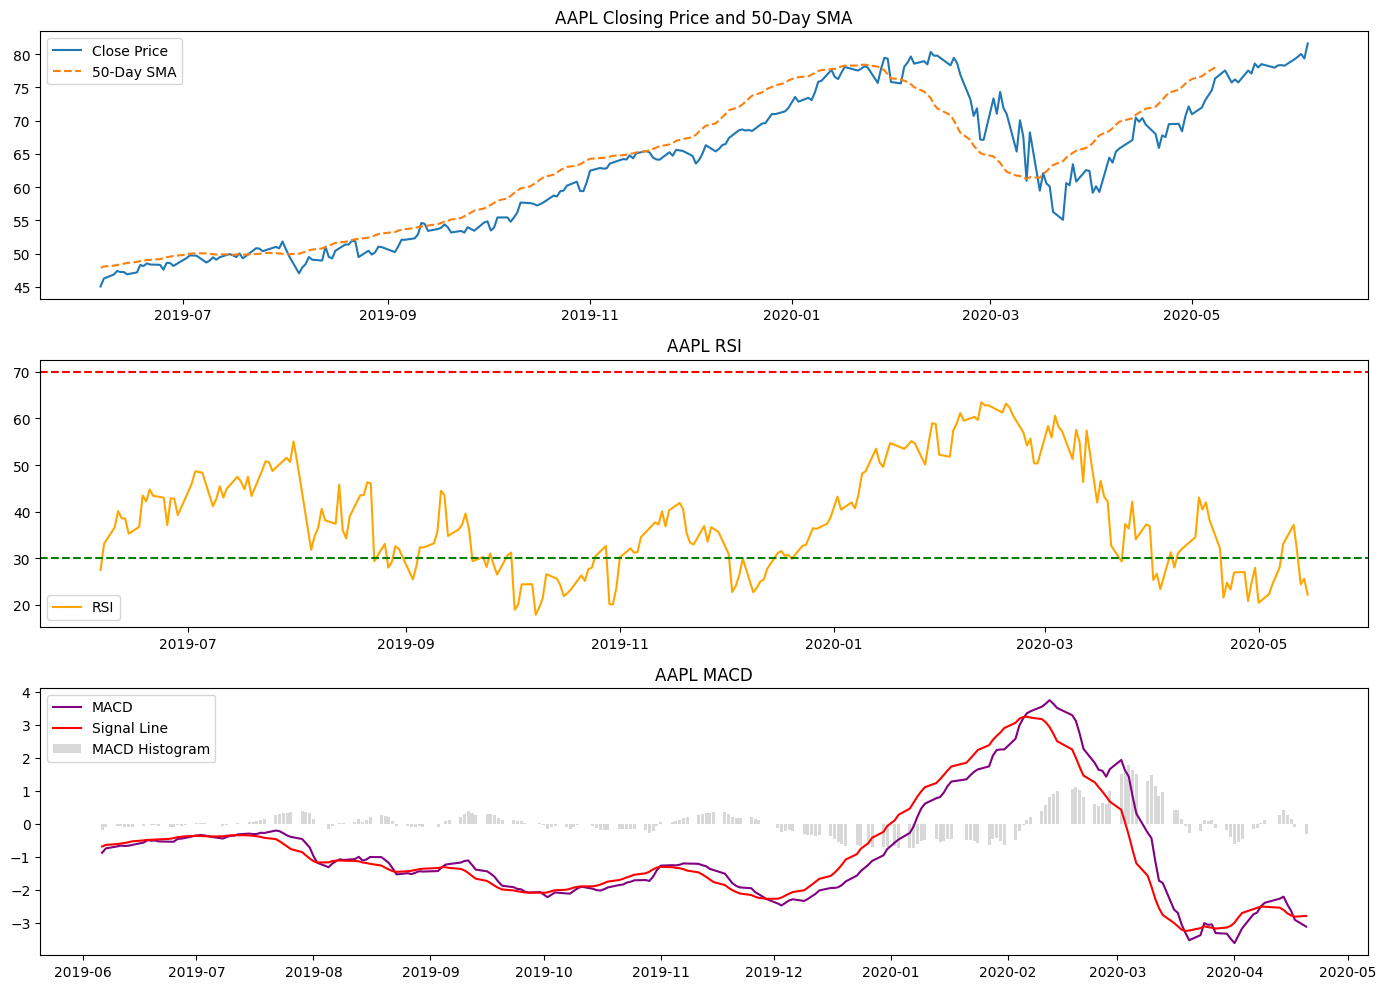

In [8]:
# Plot Moving Average, RSI, and MACD for AAPL
plt.figure(figsize=(14, 10))

# Plot Closing Price and SMA
plt.subplot(3, 1, 1)
plt.plot(aapl_data['Close'], label='Close Price')
plt.plot(aapl_data['SMA_50'], label='50-Day SMA', linestyle='--')
plt.title('AAPL Closing Price and 50-Day SMA')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(aapl_data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL RSI')
plt.legend()

# Plot MACD and Signal Line
plt.subplot(3, 1, 3)
plt.plot(aapl_data['MACD'], label='MACD', color='purple')
plt.plot(aapl_data['MACD_signal'], label='Signal Line', color='red')
plt.bar(aapl_data.index, aapl_data['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('AAPL MACD')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
aapl_data.tail()

,Open,High,Low,Close,Volume,SMA_50,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,
2019-06-12,47.1821,47.6746,47.0435,47.2369,7.503511e+07,48.391610,38.593993,-0.674300,-0.582407,-0.091894
2019-06-11,47.3985,47.6826,47.0954,47.3865,1.107155e+08,48.289075,40.123810,-0.661747,-0.598275,-0.063472
2019-06-10,46.6617,47.5261,46.6148,46.8471,1.077885e+08,48.183695,36.584714,-0.687400,-0.616100,-0.071300
2019-06-07,45.3676,46.6876,45.1911,46.2539,1.261372e+08,48.063660,33.124418,-0.746985,-0.642277,-0.104708
2019-06-06,44.5361,45.1184,44.3108,45.0556,9.260103e+07,47.832365,27.471798,-0.880747,-0.689971,-0.190776


In [10]:
df = pd.read_csv('../data/raw_analyst_ratings/raw_analyst_ratings.csv', parse_dates=['date'])

In [11]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [13]:

df['date'] = pd.to_datetime(df['date'], format='ISO8601', utc=True)
# Assuming the timestamp column is named 'timestamp'
df['date'] = df['date'].dt.date
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [14]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [15]:
df[['date','headline','url','publisher','stock']].head()

,date,headline,url,publisher,stock
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


In [18]:
# 1.1 Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['headline'].apply(get_sentiment)


In [62]:
df[['date','publisher','stock','sentiment']]

,date,publisher,stock,sentiment
0,2020-06-05,Benzinga Insights,A,Neutral
1,2020-06-03,Benzinga Insights,A,Neutral
2,2020-05-26,Lisa Levin,A,Neutral
3,2020-05-22,Lisa Levin,A,Neutral
4,2020-05-22,Vick Meyer,A,Neutral
...,...,...,...,...
1407323,2011-08-29,Monica Gerson,ZX,Positive
1407324,2011-06-22,Benjamin Lee,ZX,Positive
1407325,2011-06-21,BenzingaStaffL,ZX,Neutral
1407326,2011-06-21,Joe Young,ZX,Neutral


In [65]:
start_date = pd.to_datetime('2019-06-06')
end_date = pd.to_datetime('2020-06-05')

# Filter the DataFrame based on the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date) & (df['stock'] == 'AAPL')]


# Merge sentiment data with stock data on the date
merged_df = pd.merge(filtered_df, aapl_data, left_on='date', right_on='Date')

# Display the first few rows of the merged DataFrame
print(merged_df.tail())


     Unnamed: 0                                           headline  \
400        7585  UBS Maintains Buy on Apple, Lowers Price Targe...   
401        7586                  123 Biggest Movers From Yesterday   
402        7587  Crude Awakening: Energy Sector Takes A 20% Spi...   
403        7588     Investor Movement Index Summary: February 2020   
404        7589      101 Stocks Moving In Monday's Mid-Day Session   

                                                   url      publisher  \
400  https://www.benzinga.com/news/20/03/15514989/u...     Vick Meyer   
401  https://www.benzinga.com/news/20/03/15514298/1...     Lisa Levin   
402  https://www.benzinga.com/news/earnings/20/03/1...     JJ Kinahan   
403  https://www.benzinga.com/news/earnings/20/03/1...  TD Ameritrade   
404  https://www.benzinga.com/news/20/03/15508983/1...     Lisa Levin   

          date stock sentiment     Open     High      Low    Close  \
400 2020-03-10  AAPL   Neutral  68.0354  70.3235  66.1313  70.0513   


In [66]:
# Example sentiment encoding: Positive -> 1, Neutral -> 0, Negative -> -1
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
merged_df['sentiment_numeric'] = merged_df['sentiment'].map(sentiment_mapping)

# Calculate the correlation between sentiment and stock price changes
correlation = merged_df[['sentiment_numeric', 'Open', 'High', 'Low', 'Close']].corr()

# Display the correlation
print(correlation)



                   sentiment_numeric      Open      High       Low     Close
sentiment_numeric           1.000000  0.000908 -0.001580  0.001620  0.004487
Open                        0.000908  1.000000  0.985678  0.991814  0.981073
High                       -0.001580  0.985678  1.000000  0.983587  0.983623
Low                         0.001620  0.991814  0.983587  1.000000  0.982676
Close                       0.004487  0.981073  0.983623  0.982676  1.000000


In [70]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define colors based on sentiment score
colors = merged_df['sentiment_numeric'].apply(lambda x: 'green' if x > 0 else 'red' if x < 0 else 'gray')

# Create subplots: 2 row, 1 columns
fig = make_subplots(rows=2, cols=1, subplot_titles=("AAPL M Sentiment Scores", "AAPL Open Price"))

# Add the first plot (Sentiment Scores)
fig.add_trace(
    go.Bar(x=merged_df['date'], y=merged_df['sentiment_numeric'],marker_color=colors, name="Sentiment Score"),
    row=1, col=1
)

# Add the second plot (Stock Open price)
fig.add_trace(
    go.Scatter(x=merged_df['date'], y=merged_df['Open'], mode='lines', name="Price"),
    row=2, col=1
)

# Update layout
fig.update_layout(height=800, width=1000, showlegend=True)

# Show plot
fig.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14208\1459353848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Daily_Return'] = merged_df['Close'].pct_change() * 100


Correlation between Daily Stock Returns and Sentiment Scores:
                   Daily_Return  sentiment_numeric
Daily_Return           1.000000          -0.001471
sentiment_numeric     -0.001471           1.000000


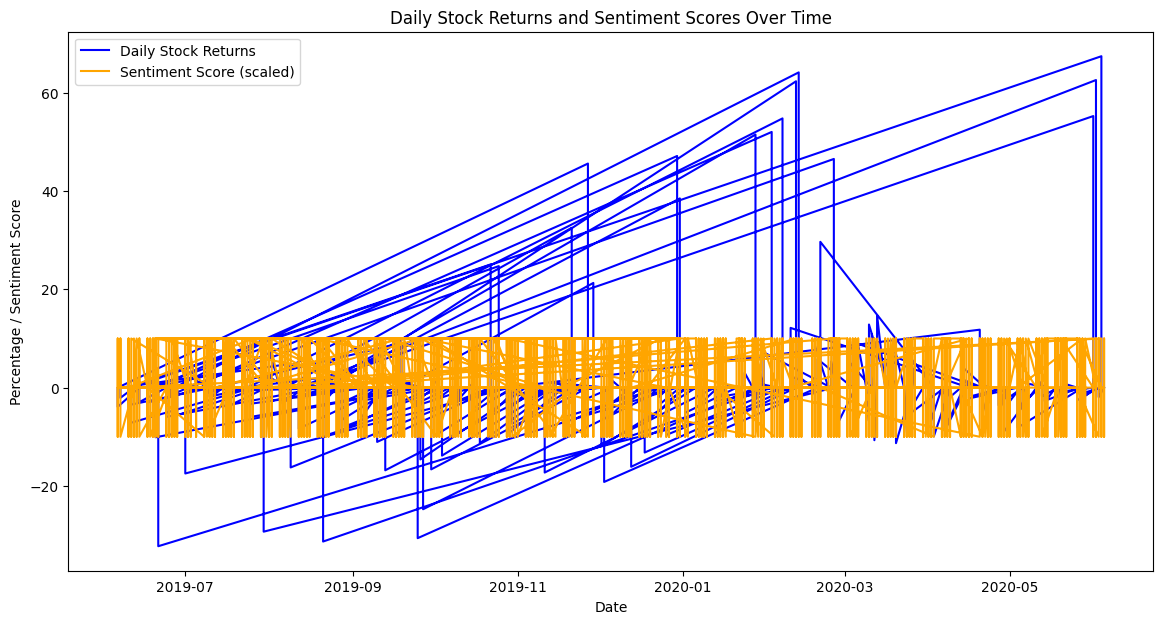

In [27]:
# 1. Calculate Daily Stock Returns
merged_df['Daily_Return'] = merged_df['Close'].pct_change() * 100

# Drop the first row with NaN due to pct_change
merged_df = merged_df.dropna(subset=['Daily_Return'])

# 2. Correlation Analysis
# Calculate the correlation between daily stock returns and sentiment scores
correlation = merged_df[['Daily_Return', 'sentiment_numeric']].corr()

# Display the correlation
print("Correlation between Daily Stock Returns and Sentiment Scores:")
print(correlation)

# 3. Plotting
# Create a line plot for Daily Stock Returns and Sentiment Scores
plt.figure(figsize=(14, 7))

# Plotting Daily Returns
plt.plot(merged_df['date'], merged_df['Daily_Return'], label='Daily Stock Returns', color='blue')

# Plotting Sentiment Scores (scaled to match the range)
plt.plot(merged_df['date'], merged_df['sentiment_numeric'] * 10, label='Sentiment Score (scaled)', color='orange')

# Adding titles and labels
plt.title('Daily Stock Returns and Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage / Sentiment Score')
plt.legend()

# Show plot
plt.show()


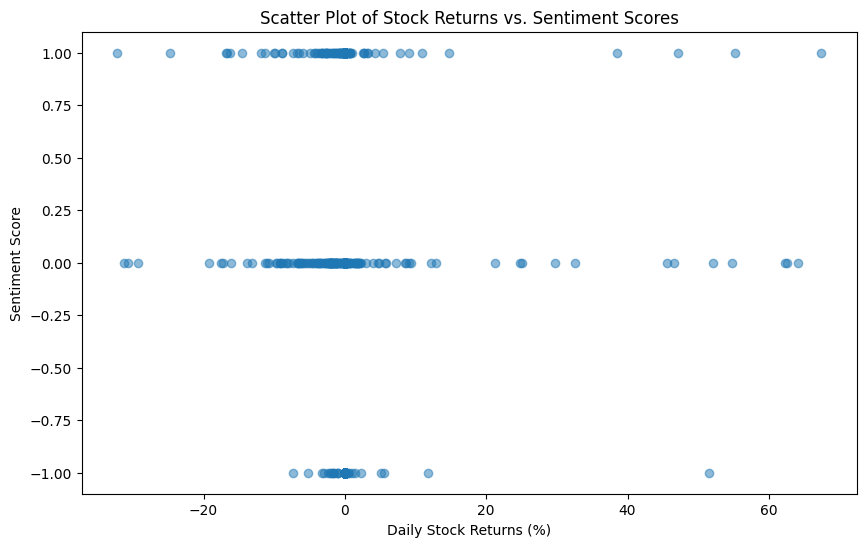

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Daily_Return'], merged_df['sentiment_numeric'], alpha=0.5)
plt.title('Scatter Plot of Stock Returns vs. Sentiment Scores')
plt.xlabel('Daily Stock Returns (%)')
plt.ylabel('Sentiment Score')
plt.show()

In [30]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Example data
# Assuming df is your DataFrame that contains datetime index, 'sentiment_score' and 'price' columns
# If you don't have the data ready, you can simulate it as follows:
# df = pd.DataFrame({
#     'date_time': pd.date_range(start='2023-07-05 06:00', end='2023-07-06 12:00', freq='H'),
#     'sentiment_score': [0.1, -0.2, 0.0, -0.5, 0.3, 0.6, -0.1, 0.2, -0.4, 0.5, 0.1, -0.3],
#     'price': [192.5, 192.0, 191.5, 190.5, 191.0, 190.0, 190.5, 191.5, 192.0, 191.0, 192.5, 193.0]
# })
# df['date_time'] = pd.to_datetime(df['date_time'])

# If you have the data ready, just load it directly
# df = pd.read_csv('your_data.csv')

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("AAPL Hourly Sentiment Scores", "AAPL Price"))

# Add the first plot (Sentiment Scores)
fig.add_trace(
    go.Bar(x=df['date'], y=df['sentiment_numeric'], name="Sentiment Score"),
    row=1, col=1
)

# Add the second plot (Stock Prices)
fig.add_trace(
    go.Scatter(x=df['date'], y=df['price'], mode='lines', name="Price"),
    row=1, col=2
)

# Update layout
fig.update_layout(height=400, width=800, showlegend=False)

# Show plot
fig.show()


KeyError: 'sentiment_numeric'